In [2]:
# initialization, read csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import ast

raw = pd.read_csv("combined_genki_lessons.csv")
raw.head()

,Unnamed: 0,kanji,strokes,frequency,grade,jlpt,parts,radicals,on_readings,kun_readings,...,Number of Appearances on Wikipedia,Percentage of Appearances on Wikipedia,Rank of Appearances on Wikipedia,Number of Appearances on News,Percentage of Appearances on News,Rank of Appearances on News,Number of Appearances on Aozora,Percentage of Appearances on Aozora,Rank of Appearances on Aozora,Genki_Lesson
0,0,亜,7.0,1509.0,junior high,N1,{'一': 'http:////jisho.org/search/%E4%B8%80%20%...,{'二': 'two'},{'ア': 'http:////jisho.org/search/%E4%BA%9C%20%...,{'つ.ぐ': 'http:////jisho.org/search/%E4%BA%9C%2...,...,172858.0,0.000220,836.0,689.0,0.000067,1306.0,3506.0,0.000068,1710.0,NaN
1,1,哀,9.0,1715.0,junior high,N1,{'亠': 'http:////jisho.org/search/%E4%BA%A0%20%...,"{'口': 'mouth, opening'}",{'アイ': 'http:////jisho.org/search/%E5%93%80%20...,{'あわ.れ': 'http:////jisho.org/search/%E5%93%80%...,...,19390.0,0.000025,1884.0,167.0,0.000016,1842.0,10141.0,0.000197,971.0,NaN
2,2,挨,10.0,2258.0,junior high,NaN,{'厶': 'http:////jisho.org/search/%E5%8E%B6%20%...,{'手 (扌龵)': 'hand'},{'アイ': 'http:////jisho.org/search/%E6%8C%A8%20...,{'ひら.く': 'http:////jisho.org/search/%E6%8C%A8%...,...,12111.0,0.000015,2138.0,13.0,0.000001,2634.0,6784.0,0.000132,1249.0,NaN
3,3,愛,13.0,640.0,grade 4,N3,{'冖': 'http:////jisho.org/search/%E5%86%96%20%...,"{'心 (忄, ⺗)': 'heart'}",{'アイ': 'http:////jisho.org/search/%E6%84%9B%20...,{'いと.しい': 'http:////jisho.org/search/%E6%84%9B...,...,754387.0,0.000962,269.0,5340.0,0.000518,503.0,54392.0,0.001057,213.0,NaN
4,4,曖,17.0,NaN,junior high,NaN,{'冖': 'http:////jisho.org/search/%E5%86%96%20%...,"{'日': 'sun, day'}",{'アイ': 'http:////jisho.org/search/%E6%9B%96%20...,{'くら.い': 'http:////jisho.org/search/%E6%9B%96%...,...,116055.0,0.000148,1025.0,30.0,0.000003,2371.0,1001.0,0.000019,2661.0,NaN


In [3]:
raw.describe()

,Unnamed: 0,strokes,frequency,wanikani_level,Number of Appearances on Twitter,Percentage of Appearances on Twitter,Rank of Appearances on Twitter,Number of Appearances on Wikipedia,Percentage of Appearances on Wikipedia,Rank of Appearances on Wikipedia,Number of Appearances on News,Percentage of Appearances on News,Rank of Appearances on News,Number of Appearances on Aozora,Percentage of Appearances on Aozora,Rank of Appearances on Aozora,Genki_Lesson
count,2136.000000,2136.000000,2037.000000,1977.000000,2130.000000,2.130000e+03,2130.000000,2.135000e+03,2.135000e+03,2135.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,316.000000
mean,1067.500000,10.468633,1051.812960,29.916540,4616.680751,4.614417e-04,1184.940376,3.604869e+05,4.594739e-04,1166.812178,4798.309568,4.650176e-04,1139.919325,22685.139306,0.000441,1241.104128,13.180380
std,616.754408,3.792999,636.127593,17.251111,12486.566946,1.248044e-03,789.329591,8.704634e+05,1.109486e-03,772.091799,10578.507221,1.025193e-03,725.694993,48051.751216,0.000933,869.792781,6.037638
min,0.000000,1.000000,1.000000,1.000000,1.000000,9.995096e-08,1.000000,4.000000e+01,5.098370e-08,1.000000,1.000000,9.691280e-08,1.000000,90.000000,0.000002,1.000000,3.000000
25%,533.750000,8.000000,510.000000,15.000000,283.000000,2.828612e-05,536.250000,2.755650e+04,3.512331e-05,536.500000,267.500000,2.592418e-05,533.750000,3152.000000,0.000061,541.750000,8.000000
50%,1067.500000,10.000000,1021.000000,30.000000,1188.000000,1.187417e-04,1087.500000,9.885400e+04,1.259986e-04,1082.000000,1205.000000,1.167799e-04,1079.500000,8343.500000,0.000162,1106.500000,13.000000
75%,1601.250000,13.000000,1558.000000,45.000000,3964.750000,3.962806e-04,1739.750000,3.470855e+05,4.423926e-04,1695.500000,4938.500000,4.786039e-04,1672.500000,22070.750000,0.000429,1773.500000,18.000000
max,2135.000000,29.000000,2495.000000,60.000000,291692.000000,2.915490e-02,4490.000000,2.106659e+07,2.685132e-02,6635.000000,225707.000000,2.187390e-02,3618.000000,754287.000000,0.014652,4504.000000,23.000000


# Number of strokes (X) - rank of frequency, average (Y)

In [4]:
#USE BOX PLOT, CALCULATE MAX/MIN

# Initialization
container1 = [np.nan]

stroke_char_count = [np.nan]

# For each # of stroke (1~29)
for strnum in np.arange(1,30):
    
    # Find all rows where strokes equal to the current loop number
    raw_in_strnum = raw[raw["strokes"] == strnum]
    
    # Calculate the number of kanjis with that stroke (where frequency data != NaN), append to count array
    stroke_char_count.append(raw_in_strnum["frequency"].count())
    
    # Append those kanji's frequency ranks to a container
    container1.append(list(raw_in_strnum["frequency"].dropna()))
    
# The container has (ideally) 29 lists, each contains the rank of frequencies of kanjis with corresponding strokes.
# So container[1] is kanjis with 1 stroke, their frequency ranks
container1

[nan,
 [2.0, 1841.0],
 [55.0, 115.0, 8.0, 5.0, 1312.0, 1794.0, 9.0, 56.0, 92.0, 1874.0, 792.0, 62.0],
 [97.0,
  1349.0,
  542.0,
  688.0,
  544.0,
  1802.0,
  1098.0,
  284.0,
  299.0,
  2478.0,
  1497.0,
  14.0,
  131.0,
  526.0,
  72.0,
  151.0,
  114.0,
  35.0,
  1375.0,
  1763.0,
  1669.0,
  924.0,
  195.0,
  181.0,
  7.0,
  307.0,
  661.0,
  1730.0,
  375.0,
  308.0],
 [218.0,
  69.0,
  684.0,
  89.0,
  574.0,
  617.0,
  1738.0,
  1202.0,
  1673.0,
  137.0,
  860.0,
  23.0,
  1326.0,
  192.0,
  1564.0,
  575.0,
  31.0,
  914.0,
  154.0,
  118.0,
  2052.0,
  49.0,
  159.0,
  310.0,
  84.0,
  1940.0,
  60.0,
  337.0,
  2077.0,
  287.0,
  1782.0,
  157.0,
  1332.0,
  223.0,
  339.0,
  324.0,
  1029.0,
  552.0,
  1402.0,
  11.0,
  1840.0,
  2025.0,
  512.0,
  1885.0,
  1980.0,
  44.0,
  2213.0,
  1.0,
  191.0,
  329.0,
  1384.0,
  101.0,
  335.0,
  646.0,
  819.0,
  24.0,
  190.0,
  1076.0,
  46.0,
  1646.0,
  317.0,
  1179.0,
  2123.0,
  622.0,
  180.0,
  93.0],
 [718.0,
  126.0,
  6

In [5]:
# some of the characters do not have a frequency number. That's why although the maximum is 29, some of them are NaNs.
raw[raw["strokes"] == 29]

# So focus on the meaningful values, strokes from 1 to 23

,Unnamed: 0,kanji,strokes,frequency,grade,jlpt,parts,radicals,on_readings,kun_readings,...,Number of Appearances on Wikipedia,Percentage of Appearances on Wikipedia,Rank of Appearances on Wikipedia,Number of Appearances on News,Percentage of Appearances on News,Rank of Appearances on News,Number of Appearances on Aozora,Percentage of Appearances on Aozora,Rank of Appearances on Aozora,Genki_Lesson
62,62,鬱,29.0,NaN,junior high,NaN,{'冖': 'http:////jisho.org/search/%E5%86%96%20%...,"{'鬯': 'herbs, sacrificial wine'}",{'ウツ': 'http:////jisho.org/search/%E9%AC%B1%20...,{'うっ.する': 'http:////jisho.org/search/%E9%AC%B1...,...,9881.0,0.000013,2246.0,13.0,0.000001,2628.0,4575.0,0.000089,1525.0,NaN


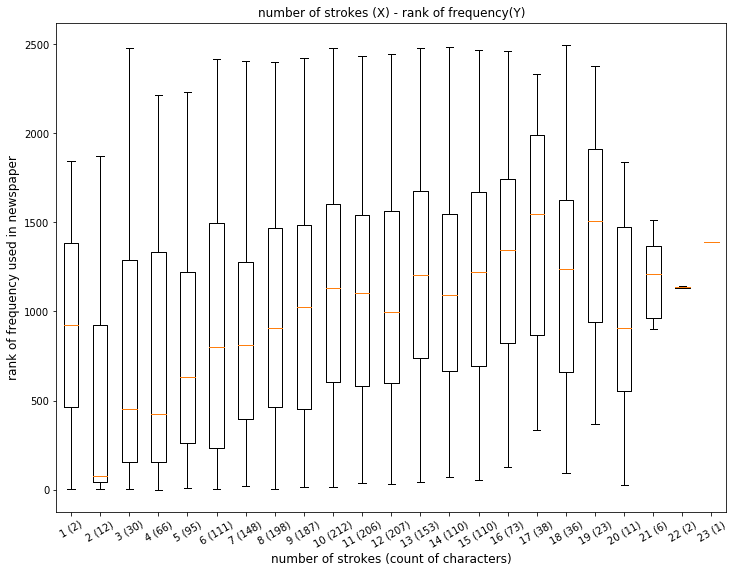

In [6]:
# Plotting

# Add figure, axis
fig = plt.figure(figsize=(12,9))
axis = fig.add_subplot(1,1,1)

# Box plot
axis.boxplot(container1[1:24])

# Title, xlabel, ylabel
axis.set_title("number of strokes (X) - rank of frequency(Y)", fontsize="large")
axis.set_xlabel("number of strokes (count of characters)", fontsize="large")
axis.set_ylabel("rank of frequency used in newspaper", fontsize="large")

# Generate xticks and its labels
xticks = []
for i in np.arange(1,24):
    xticks.append("{} ({})".format(i, stroke_char_count[i]))
    
axis.set_xticks(np.arange(1,24))
axis.set_xticklabels(xticks,rotation=30)

# useless, avoid output from set_xticklabels
print("")

# Difficulty Level (X) - rank of frequency, average (Y)

In [7]:
# how many different grades in our DF
raw_grades = raw["grade"].unique()
# sort every value except NaN, which happens to be the last element
grades = np.sort(raw_grades[:-1])
grades

array(['grade 1', 'grade 2', 'grade 3', 'grade 4', 'grade 5', 'grade 6',
       'junior high'], dtype=object)

In [8]:
# Initialization. Container 2 is the list of "list of frequencies of kanjis taught in some grade"
container2 = []

grade_char_count = []

# For all grades
for gradenum in np.arange(len(grades)):
    
    # locate all rows with that grade
    raw_in_gradenum = raw[raw["grade"] == grades[gradenum]]

    # count the number of kanjis taught in that grade
    grade_char_count.append(raw_in_gradenum["frequency"].count())
    
    # append the list of frequencies to containers
    container2.append(list(raw_in_gradenum['frequency'].dropna()))
    
container2

[[2.0,
  602.0,
  950.0,
  69.0,
  684.0,
  491.0,
  97.0,
  574.0,
  578.0,
  1787.0,
  63.0,
  113.0,
  55.0,
  642.0,
  737.0,
  53.0,
  304.0,
  23.0,
  1326.0,
  22.0,
  31.0,
  284.0,
  294.0,
  630.0,
  14.0,
  131.0,
  72.0,
  47.0,
  1488.0,
  485.0,
  1328.0,
  115.0,
  333.0,
  60.0,
  8.0,
  13.0,
  151.0,
  114.0,
  35.0,
  609.0,
  5.0,
  223.0,
  143.0,
  29.0,
  589.0,
  924.0,
  342.0,
  584.0,
  195.0,
  181.0,
  173.0,
  402.0,
  967.0,
  343.0,
  253.0,
  7.0,
  240.0,
  593.0,
  11.0,
  1351.0,
  292.0,
  512.0,
  90.0,
  307.0,
  9.0,
  1.0,
  56.0,
  6.0,
  483.0,
  92.0,
  163.0,
  190.0,
  317.0,
  10.0,
  177.0,
  76.0,
  58.0,
  62.0,
  656.0,
  93.0],
 [218.0,
  748.0,
  1256.0,
  628.0,
  887.0,
  340.0,
  531.0,
  659.0,
  133.0,
  519.0,
  199.0,
  50.0,
  4.0,
  200.0,
  895.0,
  81.0,
  805.0,
  373.0,
  171.0,
  33.0,
  542.0,
  787.0,
  676.0,
  2020.0,
  149.0,
  504.0,
  1802.0,
  1202.0,
  1208.0,
  74.0,
  112.0,
  166.0,
  194.0,
  1219.0,
  418.

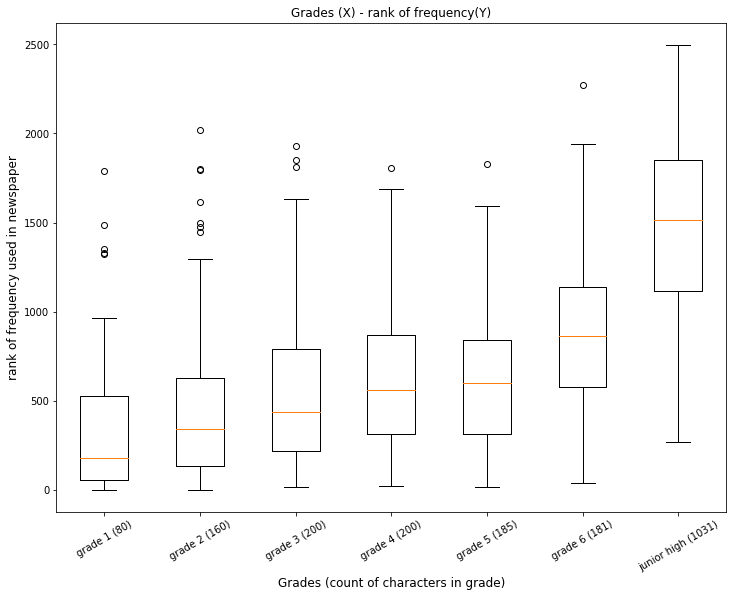

In [9]:
# Initialization, figure and axis
fig2 = plt.figure(figsize=(12,9))
axis21 = fig2.add_subplot(1,1,1)

# Box plot
axis21.boxplot(container2)

# Title, xlabel, ylabel
axis21.set_title("Grades (X) - rank of frequency(Y)", fontsize="large")
axis21.set_xlabel("Grades (count of characters in grade)", fontsize="large")
axis21.set_ylabel("rank of frequency used in newspaper", fontsize="large")

# generate and set xticks and labels
xticks21 = []
for i in np.arange(len(grades)):
    xticks21.append("{} ({})".format(grades[i], grade_char_count[i]))
    
axis21.set_xticks(np.arange(1,len(grades)+1))
axis21.set_xticklabels(xticks21,rotation=30)

# Avoid output from set_xticklabels
print("")

# Group of Radicals (X) - rank of frequency (Y)

In [10]:
# get all radicals from the table
raw_radicals = [ast.literal_eval(res).keys() for res in raw['radicals'].unique()]

# pick only the first character of those radicals
radicals = [list(x)[0][0] for x in raw_radicals]
radicals

['二',
 '口',
 '手',
 '心',
 '日',
 '土',
 '宀',
 '山',
 '木',
 '人',
 '衣',
 '囗',
 '匸',
 '女',
 '爪',
 '田',
 '肉',
 '寸',
 '禾',
 '艸',
 '彐',
 '辵',
 '糸',
 '一',
 '士',
 '弓',
 '卩',
 '阜',
 '水',
 '食',
 '音',
 '羽',
 '雨',
 '鬯',
 '小',
 '言',
 '彡',
 '金',
 '行',
 '疒',
 '皿',
 '馬',
 '走',
 '門',
 '冂',
 '廴',
 '火',
 '犬',
 '色',
 '玉',
 '凵',
 '大',
 '彳',
 '欠',
 '殳',
 '尸',
 '虍',
 '乛',
 '匕',
 '力',
 '夊',
 '貝',
 '示',
 '革',
 '竹',
 '虫',
 '牙',
 '瓦',
 '戈',
 '隹',
 '己',
 '白',
 '角',
 '夕',
 '骨',
 '邑',
 '見',
 '車',
 '石',
 '子',
 '頁',
 '刀',
 '干',
 '甘',
 '缶',
 '冖',
 '目',
 '攴',
 '韋',
 '舟',
 '丶',
 '气',
 '巾',
 '无',
 '鬼',
 '龜',
 '幺',
 '月',
 '方',
 '羊',
 '牛',
 '丿',
 '臼',
 '穴',
 '厶',
 '工',
 '足',
 '魚',
 '八',
 '亠',
 '十',
 '矢',
 '立',
 '冫',
 '曰',
 '斤',
 '丨',
 '儿',
 '鳥',
 '血',
 '玄',
 '厂',
 '戶',
 '广',
 '鼓',
 '勹',
 '老',
 '香',
 '耒',
 '高',
 '黃',
 '酉',
 '豕',
 '谷',
 '黑',
 '齊',
 '止',
 '网',
 '生',
 '歹',
 '支',
 '氏',
 '至',
 '齒',
 '耳',
 '自',
 '亅',
 '辛',
 '鹿',
 '弋',
 '赤',
 '斗',
 '釆',
 '又',
 '首',
 '尢',
 '里',
 '聿',
 '巛',
 '夂',
 '匚',
 '米',
 '辰',
 '臣',
 '身',
 '西',
 '青'

In [11]:
# Initialization
container3 = {}
radical_char_count = []

# For each radical
for rad in np.arange(len(radicals)):
    
    # Locate all rows with that radical
    raw_in_radnum = raw[[(x.find(radicals[rad]) != -1) for x in raw['radicals']]]

    # Count the number of kanjis with that radical
    radical_char_count.append(raw_in_radnum["radicals"].count())
    
    # Append to container dictionary. Key is the radical, value is a list of frequencies of kanjis with that radical
    container3[radicals[rad]]=list(raw_in_radnum['frequency'].dropna())
  
#
# Combine them into 2-tuples
container32 = [(x,container3[x]) for x in container3.keys()]

# Sorting function
def sort_key(x):
    a,b = x
    return -len(b)

f=sort_key

# Sort the list
container32.sort(key=f)

# Unzip them into separate lists
rad_sorted, freq_sorted = zip(*container32)
#freq_sorted

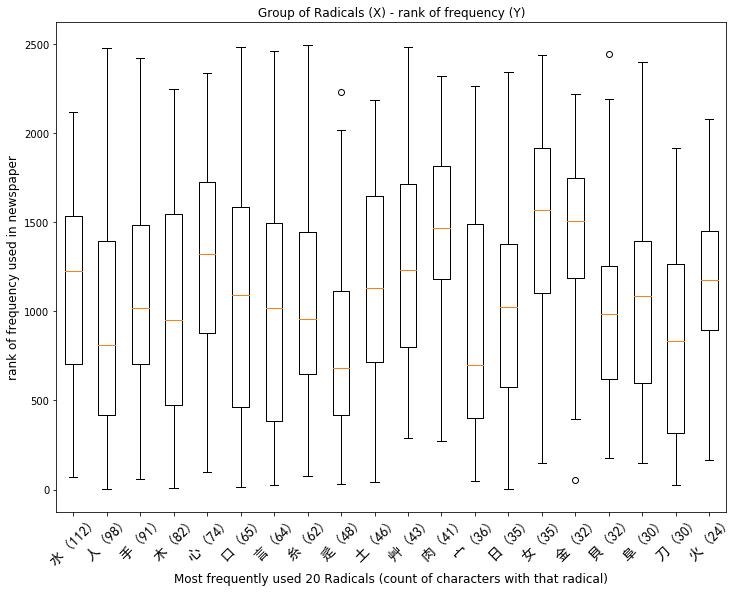

In [12]:
# Visualization needed Initialization
# Normally, Radicals cannot be correctly displayed in the matplotlib (no normal fonts support the radicals)
# So it is required to use some extra fonts
# The suggested font, "simhei.ttf", can be downloaded here: https://www.fontpalace.com/font-download/SimHei/
# Please download it and put it in the same directory as this .ipynb file

import matplotlib.font_manager as mfm

font_path = "simhei.ttf"
prop = mfm.FontProperties(fname=font_path)

# Add figure and axis
fig3 = plt.figure(figsize=(12,9))
axis31 = fig3.add_subplot(1,1,1)

# Box plot
axis31.boxplot(freq_sorted[:20])

# Title, xlabel, ylabel
axis31.set_title("Group of Radicals (X) - rank of frequency (Y)", fontsize="large")
axis31.set_xlabel("Most frequently used 20 Radicals (count of characters with that radical)", fontsize="large")
axis31.set_ylabel("rank of frequency used in newspaper", fontsize="large")

# Xticks, labels
xticks31 = []
for i in np.arange(20):
    xticks31.append("{} ({})".format(rad_sorted[i], len(freq_sorted[i])))
    
axis31.set_xticks(np.arange(1,21))
axis31.set_xticklabels(xticks31,rotation=45,fontdict={'fontproperties':prop, 'fontsize':14})

# avoid output from set_xticklabels
print("")

# Difficulty Level (grades, X) - number of Kanjis in that level (Y)

In [13]:
# List of all JLPT levels
jlpt = ['N5', 'N4', 'N3', 'N2', 'N1']

# Initialization
container4 = []

jlpt_char_count = []

# For each JLPT level
for jlptnum in np.arange(len(jlpt)):

    # Locate all kanjis with that JLPT level
    raw_in_jlptnum = raw[raw["jlpt"] == jlpt[jlptnum]]

    # Count the number of kanjis with that JLPT level
    jlpt_char_count.append(raw_in_jlptnum["frequency"].count())
    
    # Append those kanjis' frequencies to the container
    container4.append(list(raw_in_jlptnum['frequency'].dropna()))
    
container4

[[2.0,
  602.0,
  950.0,
  69.0,
  97.0,
  574.0,
  340.0,
  81.0,
  63.0,
  33.0,
  113.0,
  55.0,
  642.0,
  53.0,
  23.0,
  22.0,
  31.0,
  154.0,
  26.0,
  301.0,
  20.0,
  294.0,
  65.0,
  3.0,
  49.0,
  630.0,
  14.0,
  131.0,
  72.0,
  47.0,
  16.0,
  115.0,
  333.0,
  8.0,
  13.0,
  169.0,
  151.0,
  114.0,
  35.0,
  328.0,
  5.0,
  223.0,
  29.0,
  259.0,
  195.0,
  181.0,
  173.0,
  27.0,
  7.0,
  240.0,
  11.0,
  12.0,
  512.0,
  268.0,
  307.0,
  37.0,
  618.0,
  341.0,
  9.0,
  1.0,
  56.0,
  6.0,
  483.0,
  92.0,
  224.0,
  163.0,
  646.0,
  319.0,
  570.0,
  153.0,
  317.0,
  10.0,
  436.0,
  375.0,
  177.0,
  622.0,
  102.0,
  93.0,
  134.0],
 [530.0,
  144.0,
  126.0,
  437.0,
  99.0,
  54.0,
  150.0,
  969.0,
  255.0,
  430.0,
  404.0,
  724.0,
  616.0,
  491.0,
  578.0,
  659.0,
  133.0,
  519.0,
  199.0,
  4.0,
  200.0,
  158.0,
  59.0,
  373.0,
  1487.0,
  613.0,
  374.0,
  504.0,
  368.0,
  309.0,
  1202.0,
  440.0,
  1208.0,
  74.0,
  112.0,
  166.0,
  43.0,
  19

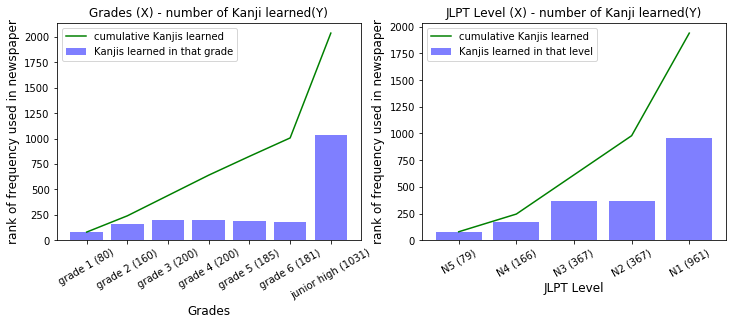

In [14]:
# Add figure, axes
# This part contains two axis comparisons: The Grades in part 2 ('grade 1, grade 2, etc.') and JLPT levels done above
fig4 = plt.figure(figsize=(12,4))
axis41 = fig4.add_subplot(1,2,1)
# Grades: bar plot of kanjis studied in that grade
axis41.bar(np.arange(len(grades)),grade_char_count, alpha=0.5, color="blue", label='Kanjis learned in that grade')

# Grades: plot of cumulative kanjis learned from grade 1
axis41.plot(np.array(grade_char_count).cumsum(),color="green",label='cumulative Kanjis learned')

# Titles etc.
axis41.set_title("Grades (X) - number of Kanji learned(Y)", fontsize="large")
axis41.set_xlabel("Grades", fontsize="large")
axis41.set_ylabel("rank of frequency used in newspaper", fontsize="large")

xticks41 = []
for i in np.arange(len(grades)):
    xticks41.append("{} ({})".format(grades[i], grade_char_count[i]))
    
axis41.set_xticks(np.arange(len(grades)))
axis41.set_xticklabels(xticks41,rotation=30)
axis41.legend(loc='best')

# Axis 2: kanjis and JLPT levels
axis42 = fig4.add_subplot(1,2,2)

# JLPT: bar plot of kanjis studied in that level
axis42.bar(np.arange(len(jlpt)),jlpt_char_count, alpha=0.5, color="blue", label='Kanjis learned in that level')

# JLPT: plot of kanjis studied till that level
axis42.plot(np.array(jlpt_char_count).cumsum(),color="green",label='cumulative Kanjis learned')

# Titles etc.
axis42.set_title("JLPT Level (X) - number of Kanji learned(Y)", fontsize="large")
axis42.set_xlabel("JLPT Level", fontsize="large")
axis42.set_ylabel("rank of frequency used in newspaper", fontsize="large")

xticks42 = []
for i in np.arange(len(jlpt)):
    xticks42.append("{} ({})".format(jlpt[i], jlpt_char_count[i]))
    
axis42.set_xticks(np.arange(len(jlpt)))
axis42.set_xticklabels(xticks42,rotation=30)
axis42.legend(loc='best')

# Aviod legend output
print()

# Experiment Area of using ast to turn list-like strings to list

In [15]:
# This part is not part for the visualization

In [16]:
import json
import ast

#res = raw[raw["kanji"] == "女"]["on_readings"]
#res = res.strip()
#ast.literal_eval(res)
raw[raw["kanji"] == "女"]["kun_readings_compounds"].all()

'["女  【おんな】  female, woman, female sex, female lover, girlfriend, mistress, (someone\'s) woman", \'女形  【おんながた】  onnagata, male actor in female kabuki roles\', \'醜女  【しゅうじょ】  homely woman, plain-looking woman, female demon\', \'囲い女  【かこいおんな】  mistress\', \'雌  【め】  female, smaller (of the two), weaker, woman, wife\', \'女神  【めがみ】  goddess, female deity\', \'早乙女  【さおとめ】  young female rice planter, young girl\', \'醜女  【しゅうじょ】  homely woman, plain-looking woman, female demon\']'